# Analysis of Shot Selection and Efficiency by Position in the NBA (1997-2022)

by Noah Rini

2022-12-16

Original data-set: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?resource=download

For my project, I chose a data set from Kaggle, originally collected from basketball-reference.com, containing information about all players and teams who have played in the BAA/NBA/ABA. The original file is a zip file that contains many different CSV files pertaining to different data, ex. team performance, player career accomplishments, etc.. I chose the set with data on player shooting percentages from different areas on the court, interested in seeing how three-point shooting has affected shot selection and how three-point volume and efficiency have changed over time. I was also interested in seeing how the most efficient field goal shooters stack up by their positions. While many of the other data sets have data going back to the 1947 season, this particular set of advanced shooting stats dates back to the 1996-97 season (denoted 1997 in the season column) and only concerns the NBA, as the BAA and ABA were no longer around at that point.

In [433]:
# importing the data

import pandas as pd

shooting = pd.read_csv("player_shooting.csv")
shooting2 = shooting.copy() # making a copy to work with
shooting2

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,30458,2023,5025,A.J. Green,NaN,SG,23,1,NBA,MIL,...,NaN,0.200,NaN,1.000,0.000,0,0.000,NaN,0,0
1,30459,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,MIN,...,NaN,NaN,1.000,NaN,1.000,1,NaN,NaN,0,0
2,30460,2023,4219,Aaron Gordon,NaN,PF,27,9,NBA,DEN,...,0.667,0.392,0.544,0.750,0.286,44,0.294,0.200,1,0
3,30461,2023,4582,Aaron Holiday,NaN,PG,26,5,NBA,ATL,...,0.429,0.462,0.143,0.750,0.000,0,0.154,0.250,0,0
4,30462,2023,4805,Aaron Nesmith,NaN,SF,23,3,NBA,IND,...,0.333,0.343,0.684,0.958,0.017,2,0.343,0.333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15843,15655,1997,2478,Willie Anderson,NaN,SG,30,9,NBA,MIA,...,0.429,0.421,0.571,1.000,0.031,2,0.368,0.714,0,0
15844,15656,1997,2632,Willie Burton,NaN,SF,28,6,NBA,ATL,...,0.556,0.283,0.577,1.000,0.052,4,0.130,0.500,0,0
15845,15657,1997,2278,Xavier McDaniel,NaN,PF,33,11,NBA,NJN,...,0.390,0.200,0.504,0.800,0.017,6,0.160,0.500,1,0
15846,15658,1997,2890,Yinka Dare,NaN,C,24,3,NBA,NJN,...,NaN,NaN,0.579,NaN,0.185,7,NaN,NaN,0,0


In [434]:
# first, removing any columns that will be of no use to my analysis.

print(shooting2.columns)

shooting2["birth_year"].notna().sum()

shooting2 = shooting2.drop(labels = {"seas_id", "player_id", "birth_year", "lg"}, axis = 1)

print(shooting2.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'fg_percent', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x0_3_range',
       'percent_fga_from_x3_10_range', 'percent_fga_from_x10_16_range',
       'percent_fga_from_x16_3p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x0_3_range',
       'fg_percent_from_x3_10_range', 'fg_percent_from_x10_16_range',
       'fg_percent_from_x16_3p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'percent_corner_3s_of_3pa',
       'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made'],
      dtype='object')
Index(['season', 'player', 'pos', 'age', 'experience', 'tm', 'g', 'mp',
       'fg_percent', 'avg_dist_fga', 'percent_fga_from_x2p_range',
       'percent_fga_from_x0_3_range', 'percent_fga_from_x3_

<AxesSubplot:>

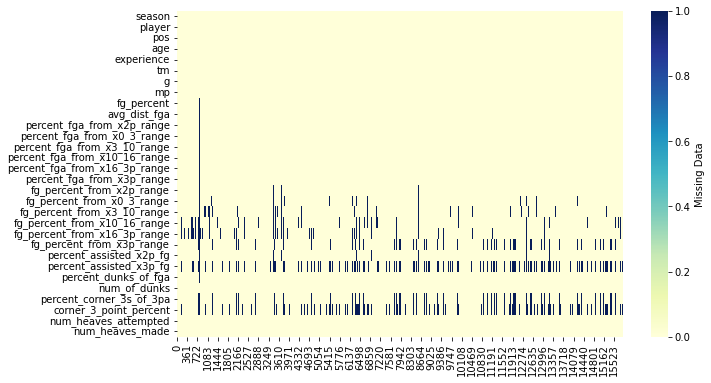

In [242]:
# I want to fill any empty/missing values.
# Start by checking which columns contain these NaN values.

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(shooting2.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# source: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/

In [435]:
# Now, filling the missing values.
# A value in this data is missing because a player did not attempt that certain shot
# or record the respective statistic that season,
# so I will replace all NaN values with "did not qualify"

shooting2 = shooting2.fillna("Did not qualify")
shooting2.isna().sum()

season                           0
player                           0
pos                              0
age                              0
experience                       0
tm                               0
g                                0
mp                               0
fg_percent                       0
avg_dist_fga                     0
percent_fga_from_x2p_range       0
percent_fga_from_x0_3_range      0
percent_fga_from_x3_10_range     0
percent_fga_from_x10_16_range    0
percent_fga_from_x16_3p_range    0
percent_fga_from_x3p_range       0
fg_percent_from_x2p_range        0
fg_percent_from_x0_3_range       0
fg_percent_from_x3_10_range      0
fg_percent_from_x10_16_range     0
fg_percent_from_x16_3p_range     0
fg_percent_from_x3p_range        0
percent_assisted_x2p_fg          0
percent_assisted_x3p_fg          0
percent_dunks_of_fga             0
num_of_dunks                     0
percent_corner_3s_of_3pa         0
corner_3_point_percent           0
num_heaves_attempted

In [436]:
# Finally, filtering the data to not include the 2022-23 season (denoted 2023),
# as it is still underway.

shooting2.drop(shooting2[shooting2["season"] == 2023].index, inplace=True)

shooting2

,season,player,pos,age,experience,tm,g,mp,fg_percent,avg_dist_fga,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
476,2022,Aaron Gordon,PF,26,8,DEN,75,2376,0.52,11.5,...,0.422,0.335,0.628,0.851,0.173,130,0.419,0.349,4,0
477,2022,Aaron Henry,SF,22,1,PHI,6,17,0.2,12.0,...,Did not qualify,0.0,1.0,Did not qualify,0.0,0,0.0,Did not qualify,0,0
478,2022,Aaron Holiday,PG,25,4,TOT,63,1021,0.447,13.1,...,0.263,0.379,0.348,0.718,0.003,0,0.155,0.438,0,0
479,2022,Aaron Holiday,PG,25,4,WAS,41,663,0.467,12.9,...,0.167,0.343,0.364,0.739,0.0,0,0.179,0.417,0,0
480,2022,Aaron Holiday,PG,25,4,PHO,22,358,0.411,13.5,...,0.308,0.444,0.314,0.688,0.008,0,0.111,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15843,1997,Willie Anderson,SG,30,9,MIA,28,303,0.453,12.7,...,0.429,0.421,0.571,1.0,0.031,2,0.368,0.714,0,0
15844,1997,Willie Burton,SF,28,6,ATL,24,380,0.336,14.2,...,0.556,0.283,0.577,1.0,0.052,4,0.13,0.5,0,0
15845,1997,Xavier McDaniel,PF,33,11,NJN,62,1170,0.389,12.0,...,0.39,0.2,0.504,0.8,0.017,6,0.16,0.5,1,0
15846,1997,Yinka Dare,C,24,3,NJN,41,313,0.352,9.2,...,Did not qualify,Did not qualify,0.579,Did not qualify,0.185,7,Did not qualify,Did not qualify,0,0


Now I can begin my analysis. Because many of the columns have non-numeric "Did not qualify" values, for each stat I will analyze, I will use a subset of the data that contains no non-numeric values in that respective category; I will do this using the .drop() function.

        percent_fga_from_x3p_range
season                            
1997                      0.195562
1998                      0.157774
1999                      0.155952
2000                      0.155715
2001                      0.149810
2002                      0.164268
2003                      0.156915
2004                      0.158675
2005                      0.181257
2006                      0.181578
2007                      0.198981
2008                      0.208487
2009                      0.213569
2010                      0.216254
2011                      0.220228
2012                      0.216261
2013                      0.236636
2014                      0.265374
2015                      0.281766
2016                      0.289998
2017                      0.321577
2018                      0.342206
2019                      0.380060
2020                      0.392926
2021                      0.392186
2022                      0.400491


<AxesSubplot:title={'center':'Shot Attempt Rate from Three-Point Range by Year'}, xlabel='Year', ylabel='Shot Attempt Rate'>

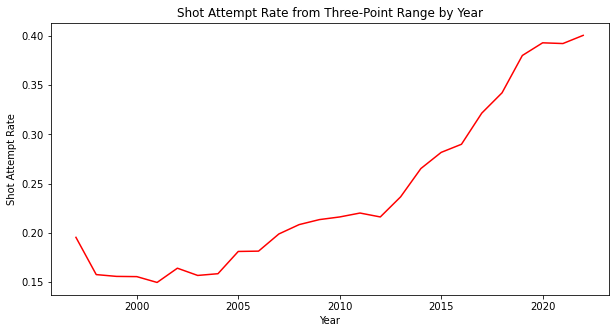

In [440]:
# 3 point shot attempts over time
# (percentage of all shots taken that are 3 pointers)

shooting3 = shooting2.copy()

shooting3.drop(shooting3[shooting3["percent_fga_from_x3p_range"] == "Did not qualify"].index, inplace=True)

# Group each season by 3 point attempt percentage,
# then use the .mean() function to find the average among all players that year.

three_by_season = shooting3.groupby("season")[["percent_fga_from_x3p_range"]].mean()
print(three_by_season)

# creating plot of the data:

three_by_season.plot(xlabel = "Year", figsize=(10,5), ylabel="Shot Attempt Rate", title = "Shot Attempt Rate from Three-Point Range by Year", legend = False, color = "red" )



From 1997 to 2022, we can observe that the percentage of three-point shots taken has greatly increased. The lowest mark in this span was in the 2000-2001 season, when just below 15% of the average shot attempts of any player were from three-point distance. This is a stark contrast to last season, where, on average, 40% of any players shot attempts for the season were three-pointers.

With the rise of the three-pointer, many people claim the mid-range jumpshot is dead. Let's see if the numbers support this:

        percent_fga_from_x10_16_range
season                               
1997                         0.137256
1998                         0.154445
1999                         0.158738
2000                         0.152741
2001                         0.155030
2002                         0.141074
2003                         0.139019
2004                         0.146624
2005                         0.123775
2006                         0.115166
2007                         0.107951
2008                         0.108668
2009                         0.102545
2010                         0.099346
2011                         0.099842
2012                         0.102574
2013                         0.099144
2014                         0.095619
2015                         0.091206
2016                         0.091089
2017                         0.084678
2018                         0.091147
2019                         0.082986
2020                         0.072991
2021        

<AxesSubplot:title={'center':"Mid-Range Shot Attempt Rate by Year (10'-16')"}, xlabel='Year', ylabel='Shot Attempt Rate'>

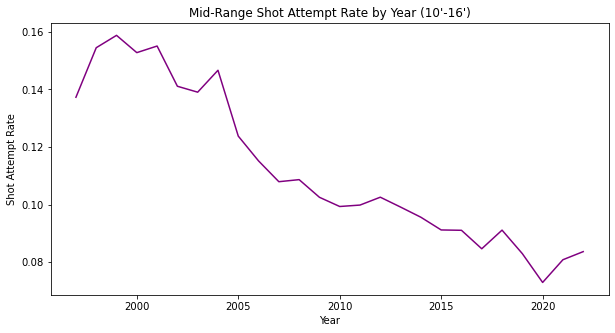

In [441]:
# Mid range shot attempts (10-16 feet from basket)
# (percentage of all shots taken that are in this range)

shooting4 = shooting2.copy()

shooting4.drop(shooting4[shooting4["percent_fga_from_x10_16_range"] == "Did not qualify"].index, inplace=True)

# Grouping each season by shot attempt rate from 10-16 feet,
# then using the .mean() function to find the average among all players that year.

midrange_by_season = shooting4.groupby("season")[["percent_fga_from_x10_16_range"]].mean()
print(midrange_by_season)

# creating plot of the data

midrange_by_season.plot(xlabel= "Year",figsize=(10,5), ylabel="Shot Attempt Rate", title = "Mid-Range Shot Attempt Rate by Year (10'-16')",legend = False, color = "purple")
                        
                        

We can observe that this increase in three-point attempts has presumably created a generally downward trend in midrange shots attempted (10-16 feet from the basket) over this time frame. While these numbers have dropped, they have only fallen in the range of 5% to 6% of all shot attempts, whereas average three-point attempts have more than doubled over that time.

Now, to analyze the trend of three-point-specialist players, I will filter the data to contain all players whose shot selection was 40% or more three-pointers and who made at least 40% of these shots, generally considered an efficient percentage.

        fg_percent_from_x3p_range
season                           
1997                           30
1998                           19
1999                           17
2000                           14
2001                           13
2002                           19
2003                            4
2004                           16
2005                           21
2006                           18
2007                           23
2008                           23
2009                           32
2010                           21
2011                           40
2012                           22
2013                           33
2014                           40
2015                           33
2016                           35
2017                           45
2018                           56
2019                           50
2020                           61
2021                           82
2022                           78


<AxesSubplot:title={'center':'Three-Point-Specialists Each Season'}, xlabel='Season', ylabel='Number of Players'>

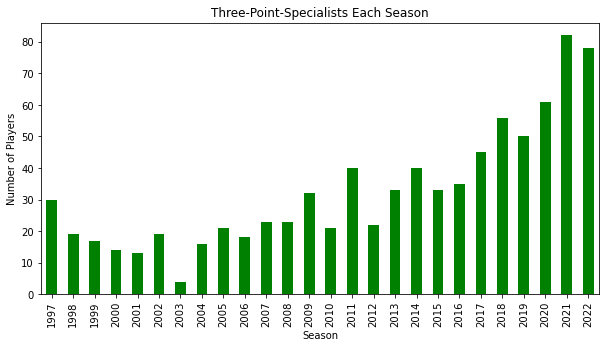

In [443]:
# Number of players shooting 40% from three whose shot attempts are at least 40% three pointers
# looking for efficiency and volume

shooting5 = shooting2.copy()

shooting5.drop(shooting5[shooting5["fg_percent_from_x3p_range"] == "Did not qualify"].index, inplace=True)

shooting5.drop(shooting5[shooting5["fg_percent_from_x3p_range"] < 0.4].index, inplace=True)
shooting5.drop(shooting5[shooting5["percent_fga_from_x3p_range"] == "Did not qualify"].index, inplace=True)
shooting5.drop(shooting5[shooting5["percent_fga_from_x3p_range"] < 0.4].index, inplace=True)

# Grouping each season by 3 point percentage,
# then using .count() function to find how many players each season met these conditions.


shooters_per_season = shooting5.groupby("season")[["fg_percent_from_x3p_range"]].count()
print(shooters_per_season)

# creating a plot of the data:

shooters_per_season.plot(kind = "bar", figsize=(10,5), title = "Three-Point-Specialists Each Season", ylabel= "Number of Players", xlabel= "Season",legend = False, color = "green")


The previous two seasons have had an average of 80 efficient three-point specialists, more than doubling the amount from the 1996-97 season, and twenty-times more than the number of these players in the 2002-03 season.

Another thing I would like to uncover is the most efficient shooting seasons key players have had since the 1996-97 season. I am defining 'key players' as players who averaged 30+ minutes per game (2460+ minutes played all season), indicating that these players had a large role on their teams. I will consider an efficient shooting percentage to be 50% or higher on all field goal attempts.

In [444]:
# Players that played at least 2460 total minutes and shot at least 50% from the field

shooting6 = shooting2.copy()

shooting6.drop(shooting6[shooting6["fg_percent"] == "Did not qualify"].index, inplace=True)
shooting6.drop(shooting6[shooting6["mp"] == "Did not qualify"].index, inplace=True)
shooting6.drop(shooting6[shooting6["fg_percent"] < 0.5].index, inplace=True)
shooting6.drop(shooting6[shooting6["mp"] < 2460].index, inplace=True)

shooting6["pos"].value_counts()
shooting6[shooting6["pos"] == "SG-PG"]

shooting6.at[5404, "pos"] = "PG"
# I needed to change one value so that it could be categorized in the next step.
# source: https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/

# For the plots, I want to assign a certain color to each position:

colors = []

for i in shooting6["pos"]:
    if i == "PG":
        colors.append("red")
    elif i == "SG":
        colors.append("yellow")
    elif i == "SF":
        colors.append("green")
    elif i == "PF":
        colors.append("blue")
    elif i == "C":
        colors.append("purple")
    
# Using a for loop to iterate through the position column,
# I assign point guards as red, shooting guards as yellow, small forwards as green,
# power forwards as blue, and centers as purple.

# I added all of these color values to an empty list,
# which I then add as a new column of the data set.
    
shooting6["color"] = colors


Text(0.5, 1.0, "Individual Seasons of 'Key Players' Shooting At Least 50%")

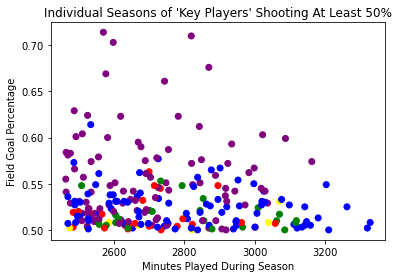

In [455]:
# plotting the data:

fig, kpm = plt.subplots()
kpm.scatter(x=shooting6["mp"], y=shooting6["fg_percent"], color=colors)
kpm.set_xlabel("Minutes Played During Season")
kpm.set_ylabel("Field Goal Percentage")
kpm.set_title("Individual Seasons of 'Key Players' Shooting At Least 50%")

As seen in the scatter plot, only one key player who does not play the center position shot over 60% for a season, while over a dozen centers surpassed that mark. 

To further analyze the efficiency of these key players and their respective positions, I plotted their number of appearances on the list by position.

<AxesSubplot:title={'center':"Most Efficient 'Key Players' by Position"}, ylabel=' '>

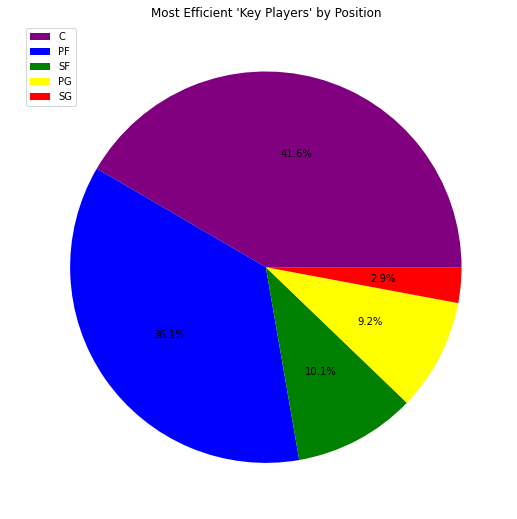

In [458]:
# Further look into number of efficient key players by position

by_pos = shooting6["pos"].value_counts()

cols = ["purple", "blue", "green", "yellow", "red"]

# plotting data: percentage of list that each position makes up 

by_pos.plot(kind="pie", ylabel=" ", title=("Most Efficient 'Key Players' by Position"),
           autopct="%1.1f%%", figsize=(9,9), labels=None, legend=True, colors=cols)

As seen in the chart, 41.6% of these players are centers, and adding in the power forwards makes up 77.7% of this list; this is expected, as all other positions typically play much more on the perimeter as thus take more longer-distance shots.

For one last insight on the efficiency of these key players, I want to look at their consistency to produce these playing numbers.

In [459]:
# Grouping players by their shooting percentages,
# then using .count() function to find the number of times they've played
# 2460+ min/season and shot at least 50% from field

players = shooting6.groupby("player")[["fg_percent"]].count()
print(players.to_string())

# source: https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe



                       fg_percent
player                           
Al Horford                      4
Al Jefferson                    2
Alonzo Mourning                 1
Amar'e Stoudemire               5
Andre Drummond                  5
Andre Iguodala                  1
Andrew Bogut                    1
Anthony Davis                   2
Anthony Mason                   3
Antonio McDyess                 1
Ben Simmons                     2
Ben Wallace                     2
Beno Udrih                      1
Bison Dele                      1
Blake Griffin                   3
Bo Outlaw                       2
Boris Diaw                      2
Brad Miller                     1
Brent Barry                     1
Brian Grant                     1
Brook Lopez                     1
Bryant Reeves                   1
Carl Landry                     1
Carlos Boozer                   4
Chris Bosh                      3
Chris Kaman                     1
Chris Mullin                    1
Chris Paul    

Text(0, 0.5, 'Number of Players')

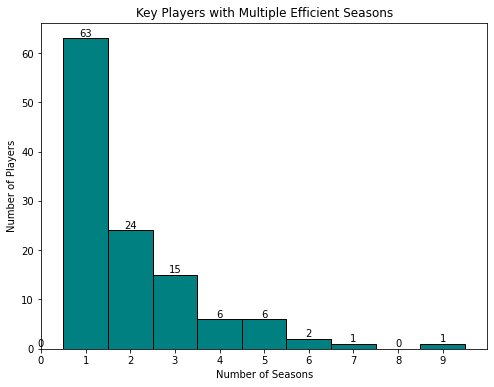

In [358]:
# plotting the data: number of times each player has accomplished this

data = shooting6["player"].value_counts()

# making sure the bars align nicely on the plot

bins = np.arange(11) - 0.5
plt.figure(figsize=(8, 6))
values, bins, freq = plt.hist(data, bins, color="teal", edgecolor="black")
plt.xticks(range(10))
plt.xlim([0,10])
plt.bar_label(freq)
plt.title("Key Players with Multiple Efficient Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of Players")

# source: https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram
# source: https://stackoverflow.com/questions/70416097/adding-data-labels-ontop-of-my-histogram-python-matplotlib
# source: https://stackoverflow.com/questions/42741687/python-histogram-outline

We see that of the players that played substantial minutes (30+ mpg) and shot at least 50% from the field, over half of them only did it once (63 out of 118). Only 4 of these players were able to produce such efficient shooting percentages more than 6 different seasons, indicating both consistent efficiency and longevity in their status as important players to their teams. When reviewing the data, these players turn out to be none other than Steve Nash, Tim Duncan, LeBron James, and Dwight Howard, four all-time great players.

Through my analysis of advanced shooting data from the NBA, I uncovered how offensive strategy has changed from the 1996-97 season to the 2021-22 season. I saw how three-point attempts have doubled over these years, as well as how the number of high-volume and efficient three-point-shooters (three-point-specialists) have shown an increasing trend. I also saw how many players playing substancial minutes (30+ mpg), who I refered to as 'key players', produced efficient shooting seasons and how each playing position was represented in this group. I believe further analysis can be done by compiling data from the other NBA statistic CSV files and adding them as new columns to the data set; by doing so, I can investigate the elite 50/40/90 club (players who shot 50%+ from the field, 40%+ from three, and 90%+ on free throws) and how the minimum shot attempts required affects who is able to qualify. I could also further explore shot percentages in each area of the court and which players have shot the greatest percentage from each spot over the course of a season.